<a href="https://colab.research.google.com/github/yadavrahyl2k15/threshold_values/blob/main/Threshold_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#to create a dataset we use following module
from sklearn.datasets import make_classification

In [ ]:
x,y=make_classification(n_samples=2000,n_classes=2,weights=[1,1],random_state=1)
print(x.shape)
print(y.shape)

(2000, 20)
(2000,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_train_pred=rf_model.predict_proba(x_train)
print("RF TRAIN roc-auc : {} ".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=rf_model.predict_proba(x_test)
print("RF TEST roc-auc : {} ".format(roc_auc_score(y_test,y_test_pred[:,1])))

RF TRAIN roc-auc : 1.0 
RF TEST roc-auc : 0.9842 


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(x_train,y_train)
y_train_pred=log_classifier.predict_proba(x_train)
print("LR TRAIN roc-auc : {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=log_classifier.predict_proba(x_test)
print("LR TEST roc-auc : {}".format(roc_auc_score(y_test,y_test_pred[:,1])))

LR TRAIN roc-auc : 0.9863568922694498
LR TEST roc-auc : 0.9885777777777777


**ADABOOST CLASSIFIER**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
y_train_pred=ada.predict_proba(x_train)
print("ADA TRAIN roc-auc : {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=ada.predict_proba(x_test)
print("ADA TEST roc-auc : {}".format(roc_auc_score(y_test,y_test_pred[:,1])))

ADA TRAIN roc-auc : 0.9975081174960356
ADA TEST roc-auc : 0.9826111111111111


**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_train_pred=knn.predict_proba(x_train)
print("KNN TRAIN roc-auc : {}".format(roc_auc_score(y_train,y_train_pred[:,1])))
y_test_pred=knn.predict_proba(x_test)
print("KNN TEST roc-auc : {} ".format(roc_auc_score(y_test,y_test_pred[:,1])))

KNN TRAIN roc-auc : 0.981670071491109
KNN TEST roc-auc : 0.9426111111111111 


In [ ]:
#choose best prediction out of 4 models
pred=[]

for model in [rf_model,log_classifier,ada,knn]:
  pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_predict=pd.concat(pred,axis=1).mean(axis=1)
print("Ensemble test roc-auc : {} ".format(roc_auc_score(y_test,final_predict)))

Ensemble test roc-auc : 0.9853222222222223 


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.96,0.966929,0.538202,0.8
3,0.86,0.761539,0.509875,0.8
4,0.58,0.779443,0.490344,0.4
...,...,...,...,...
595,0.00,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,1.00,0.984385,0.532403,1.0
598,0.01,0.001147,0.441720,0.2


In [ ]:
final_predict

0      0.880262
1      0.115823
2      0.816283
3      0.732853
4      0.562447
         ...   
595    0.121340
596    0.117845
597    0.879197
598    0.163217
599    0.829857
Length: 600, dtype: float64

In [ ]:
#CALCULATE ROC 
fpr,tpr,thresholds=roc_curve(y_test,final_predict)
thresholds

array([1.91424686, 0.91424686, 0.90623256, 0.90577475, 0.79311406,
       0.79162833, 0.7905287 , 0.7880558 , 0.77909273, 0.77821156,
       0.7508411 , 0.75037124, 0.72208108, 0.72137362, 0.70749037,
       0.70143711, 0.67692282, 0.67493537, 0.60245356, 0.59800386,
       0.59212652, 0.58614346, 0.57399047, 0.56736186, 0.55292732,
       0.54377948, 0.53605932, 0.52969563, 0.52615858, 0.50366892,
       0.45450602, 0.40936151, 0.4071034 , 0.38920009, 0.38879719,
       0.35433098, 0.34836612, 0.23448424, 0.23390421, 0.2296341 ,
       0.22896893, 0.20483682, 0.20098417, 0.12552718, 0.1253351 ,
       0.10841316])

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_1=[]
for i in thresholds:
  y_pred=np.where(final_predict>i,1,0)
  accuracy_1.append(accuracy_score(y_test,y_pred,normalize=True))


In [ ]:
accuracy_1=pd.concat([pd.Series(thresholds),pd.Series(accuracy_1)],axis=1)
accuracy_1.columns=['THRESHOLDS','ACCURACY']
accuracy_1.sort_values(by='ACCURACY',ascending=False,inplace=True)
accuracy_1.head()

,THRESHOLDS,ACCURACY
30,0.454506,0.960000
29,0.503669,0.958333
27,0.529696,0.958333
25,0.543779,0.958333
28,0.526159,0.956667


In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr,tpr,color='red',Label='ROC')
  plt.plot([0,1],[0,1],color='darkblue',Linestyle='--')
  plt.xlabel("FALSE POSITIVE RATE")
  plt.ylabel("TRUE POSITIVE RATE")
  plt.title('RECEIVER OPERATING CHARACTERISTIC[ROC] CURVE')
  plt.legend()
  plt.show()

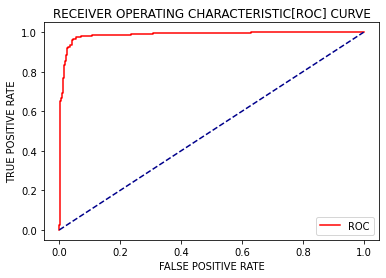

In [ ]:
plot_roc_curve(fpr,tpr)